# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [237]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#from loguru import logger

In [238]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [239]:
fifa = pd.read_csv("fifa.csv")

In [240]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [264]:
# 1 - tranformei o dataframe em array (matriz)
# 2 - removi as linhas sem com valor NaN
# 3 - depois apliquei o PCA


aux =  pd.DataFrame(fifa)
aux_array = aux.dropna()
aux_array_sem_nan = aux_array.to_numpy()

pca = PCA(n_components=2)
projected = pca.fit_transform(aux_array_sem_nan.data)
#print(f"Original shape: {aux_array_sem_nan.data.shape}, projected shape: {projected.shape}")
pca = PCA().fit(aux_array_sem_nan.data)

#Resultado questao 1
evr = pca.explained_variance_ratio_
#print(round(evr[0],3))

#Resultado questao 2
cumulative_variance_ratio = np.cumsum(evr)
component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.
#print(component_number)

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [ ]:
def q1():
    return float(round(evr[0],3))
    pass

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [ ]:
def q2():
    return int(component_number)
    pass

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [64]:
x = [  0.87747123,  -1.24990363,  -1.3191255,  -36.7341814, -35.55091139, -37.29814417, 
     -28.68671182,  -30.90902583,  -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566,   -22.72696734, -25.50360703, 2.16339005, -27.96657305,  
     -33.46004736,  -5.08943224, -30.21994603,   3.68803348, -36.10997302, -30.86899058, 
     -22.69827634, -37.95847789, -22.40090313, -30.54859849, -26.64827358, -19.28162344, 
     -34.69783578, -34.6614351,  48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

Após varias tentativas fracassada de resolução dessa questão...
Eu visualizei a resolução dos outros colegas do grupo.
É um jeito bem bobo o de se resolver...
Mas não fez mto sentido pra mim.
Engraçado que esse scater plot nao me é estranho, em alguma das minhas mil tentativas não salvas ele apareceu.
Infelizmente enviei a questão assim mesmo (), para nao ficar com score abaixo do min necessário.
https://www.youtube.com/watch?v=Lsue2gEM9D0

aux =  pd.DataFrame(fifa)
aux_array = aux.dropna()
aux_array_sem_nan = aux_array.to_numpy()

In [265]:
pca =  PCA()
#treinar com base no df principal que foi algo que me estava faltando
pca.fit(aux_array_sem_nan)
pca_data = pca.transform(aux_array_sem_nan)
#per_var = pca.explained_variance_ratio_
per_var = np.round(pca.explained_variance_ratio_*100, decimals=3)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [266]:
pca.components_.shape

(37, 37)

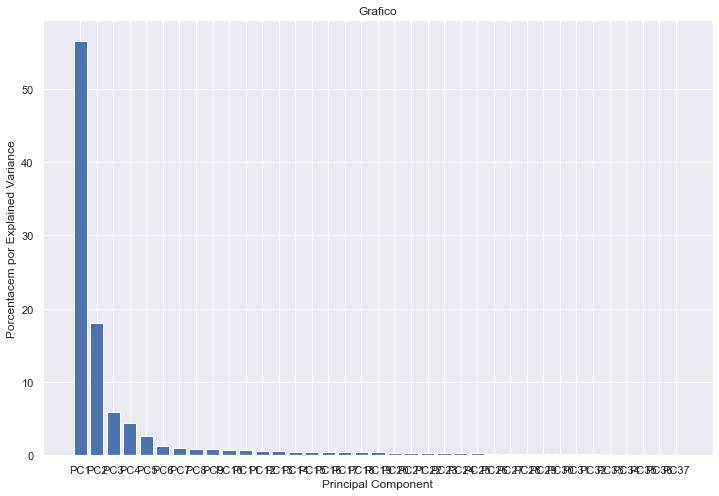

In [267]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Porcentacem por Explained Variance')
plt.xlabel('Principal Component')
plt.title('Grafico')
plt.show()

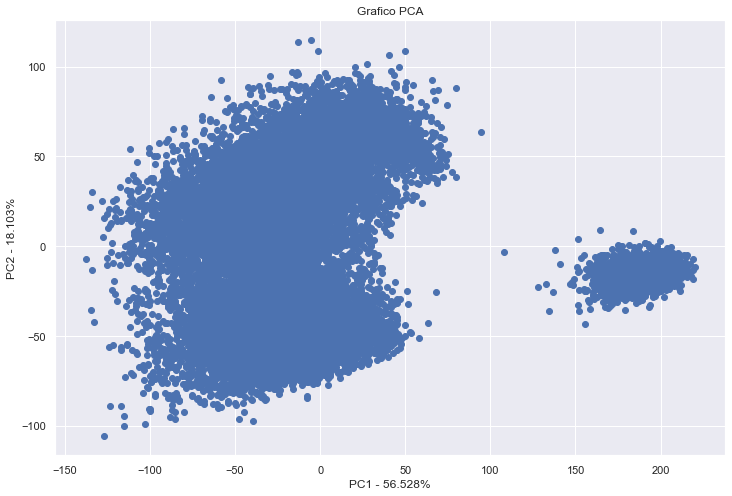

In [271]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Grafico PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#for sample in pca_df.index:
    #plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [270]:
print(np.round(pca.components_.dot(x)[0], decimals=3))
print(np.round(pca.components_.dot(x)[1], decimals=3))

186.556
-6.592


In [ ]:
def q3():
    return (np.round(pca.components_.dot(x)[0], decimals=3), np.round(pca.components_.dot(x)[1], decimals=3))
    pass

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [ ]:
def q4():
    # salvando o df fifa em um df aux
    aux =  pd.DataFrame(fifa)

    #df auxiliar sem NaN
    df_aux = aux.dropna()

    #df com todas as colunas sem Overall
    y_train = df_aux['Overall']

    #df com a coluna Overall (usei essa coluna como dica do pessoal na comunidade do curso)
    x_train = df_aux.drop(columns = 'Overall')

    #transformando x_train e y_train para array
    y = y_train.to_numpy()
    x = x_train.to_numpy()

    #agora sim implementando o RFE
    svm = LinearRegression()
    rfe = RFE(svm, 5)
    rfe = rfe.fit(x, y)

    #criando um df auxiliar para visualizar melhor o resultado
    df_aux_result = pd.DataFrame({'coluna':x_train.columns,
              'bool': rfe.support_,
              'ranking': rfe.ranking_})

    #filtrando o df axuliar de resultado  pelo ranking para pegar as 5 variaveis 
    variaveis = list(df_aux_result['coluna'][df_aux_result['ranking']==1])

    return variaveis
    pass